In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from collections import Counter

In [4]:
orders = pd.read_csv('orders_clean_V1.csv')
orderlines = pd.read_csv('orderlines_clean_V1.csv')
products = pd.read_csv('product_clean_v1.csv')
brands = pd.read_csv('brands_clean_V1.csv')

In [5]:
pd.set_option('display.max_rows', 100)
pd.set_option("display.max_colwidth", 100)

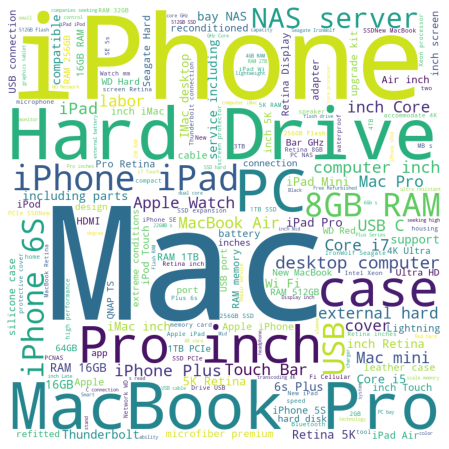

In [6]:
word_cloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = STOPWORDS).generate(products.desc.str.cat())
plt.figure(figsize = (8, 8))
plt.imshow(word_cloud)
plt.axis("off");

In [7]:
import nltk
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [8]:
# Add short_name for each type
lst_type = list(products.type.unique())
product_typ_tbl = pd.DataFrame(columns = ['type', 'short_name'])
for product_typ in lst_type:
    product_name = products[products.type == product_typ].name.str.cat(sep=' ').split()
    product_name = ' '.join([item for item in product_name if item not in ['/', '-', '+', '|']]).split() # Removing all stopwords in name
    count_dict_product = Counter(product_name)
    count_dict_product = dict(sorted(count_dict_product.items(), key = lambda x: x[1], reverse = True))
    top_n = (list(count_dict_product.items()))[:8]
    top_n_words = [item[0] for item in top_n]
    top_n_words = ' '.join(top_n_words)
    top_n_words
    new_row = {'type': product_typ, 'short_name': top_n_words}
    new_row = pd.DataFrame([new_row])
    product_typ_tbl = pd.concat([product_typ_tbl, new_row], ignore_index=True)
    #product_typ_tbl = product_typ_tbl.append(new_row, ignore_index=True)

In [9]:
# Add short_name_desc for each type
lst_type = list(products.type.unique())
product_typ_desc_tbl = pd.DataFrame(columns = ['type', 'short_name_desc'])
for product_typ in lst_type:
    product_name = products[products.type == product_typ].desc.str.cat(sep=' ').split()
    product_name = ' '.join([item for item in product_name if item not in ['/', '-', '+', '|', 'and', 'with', 'for', 'to']]).split() # Removing all stopwords in name
    count_dict_product = Counter(product_name)
    count_dict_product = dict(sorted(count_dict_product.items(), key = lambda x: x[1], reverse = True))
    top_n = (list(count_dict_product.items()))[:8]
    top_n_words = [item[0] for item in top_n]
    top_n_words = ' '.join(top_n_words)
    top_n_words
    new_row = {'type': product_typ, 'short_name_desc': top_n_words}
    new_row = pd.DataFrame([new_row])
    product_typ_desc_tbl = pd.concat([product_typ_desc_tbl, new_row], ignore_index=True)
    #product_typ_tbl = product_typ_tbl.append(new_row, ignore_index=True)

In [10]:
product_typ_cbn = product_typ_desc_tbl.merge(product_typ_tbl, on = 'type')

In [11]:
product_typ_cbn

,type,short_name_desc,short_name
0,1515,iPhone battery USB external iPad Battery small External,Battery External Power USB Mophie Bank battery mAh
1,11865403,iPhone 6 Plus case 7 Case cover microfiber,iPhone Case Plus 6 Black 6S 7 Apple
2,8696,MacBook support Pro aluminum Macbook all Support iMac,Support MacBook Aluminum Mac Pro Twelve South iMac
3,14365395,iPhone Lightning adapter iPod connector 5 Adapter iPad,Adapter Lightning Apple to iPhone Car and adapter
4,11905404,iPhone iPad iPod Bluetooth control of Touch. remote,iPhone and White Black iPad Parrot Philips Multimedia
...,...,...,...
122,"5,74E+15",5K Retina RAM computer 27 inch desktop IMac,"Apple iMac 27 ""Core Retina 5K i5 i7"
123,"9,29E+11",of MacBook Pro 13-inch Touch Bar English keyboard,"Apple MacBook Pro 13 ""with Touch Bar Keyboard"
124,51912158,MacBook Pro 15-inch Touch Bar refitted Core i7,"Pro Open Apple MacBook 15 ""Core i7 Touch"
125,21632158,Mac Pro RAM Apple PCIe New two 6-core,Apple Mac Pro RAM PCIe SSD 35GHz 6


In [12]:
import re
product_typ_cbn['category_new'] = 'no'
product_typ_cbn.loc[product_typ_cbn.short_name.str.contains('Battery|Keyboard|Mouse|Adapter|Headphone|Cable|Protector|Charging|Repair|Multimedia|Memory|AppleCare|Case|Charge', flags=re.IGNORECASE, regex=True),\
                    'category_new'] = 'Accessories'
product_typ_cbn.loc[(product_typ_cbn.short_name.str.contains('Apple', flags=re.IGNORECASE, regex=True))&(product_typ_cbn.short_name.str.contains('iMac', flags=re.IGNORECASE, regex=True))&\
                    (product_typ_cbn.category_new == 'no'),\
                    'category_new'] = 'Desktop/Laptop'
product_typ_cbn.loc[(product_typ_cbn.short_name.str.contains('Apple', flags=re.IGNORECASE, regex=True))&(product_typ_cbn.short_name.str.contains('iphone', flags=re.IGNORECASE, regex=True))&\
                    (product_typ_cbn.category_new == 'no'),\
                    'category_new'] = 'Iphone'
product_typ_cbn.loc[(product_typ_cbn.short_name.str.contains('Apple', flags=re.IGNORECASE, regex=True))&(product_typ_cbn.short_name.str.contains('Mac', flags=re.IGNORECASE, regex=True))&\
                    (product_typ_cbn.category_new == 'no'),\
                    'category_new'] = 'Desktop/Laptop'
product_typ_cbn.loc[(product_typ_cbn.short_name.str.contains('Apple', flags=re.IGNORECASE, regex=True))&(product_typ_cbn.short_name.str.contains('Ipad|Ipod', flags=re.IGNORECASE, regex=True))&\
                    (product_typ_cbn.category_new == 'no'),\
                    'category_new'] = 'Ipad/Ipod'
product_typ_cbn.loc[(product_typ_cbn.short_name.str.contains('Apple', flags=re.IGNORECASE, regex=True))&(product_typ_cbn.short_name.str.contains('Watch', flags=re.IGNORECASE, regex=True))&\
                    (product_typ_cbn.category_new == 'no'),\
                    'category_new'] = 'Apple Watch'
product_typ_cbn.loc[(product_typ_cbn.short_name.str.contains('Watch', flags=re.IGNORECASE, regex=True))&\
                    (product_typ_cbn.category_new == 'no'),\
                    'category_new'] = 'Watch'
product_typ_cbn.loc[(product_typ_cbn.short_name.str.contains('Apple', flags=re.IGNORECASE, regex=True))&(product_typ_cbn.short_name.str.contains('TV', flags=re.IGNORECASE, regex=True))&\
                    (product_typ_cbn.category_new == 'no'),\
                    'category_new'] = 'Monitor'
product_typ_cbn.loc[(product_typ_cbn.short_name.str.contains('Monitor', flags=re.IGNORECASE, regex=True))&\
                    (product_typ_cbn.category_new == 'no'),\
                    'category_new'] = 'Monitor'
# product_typ_cbn.loc[(product_typ_cbn.short_name.str.contains('Macbook', flags=re.IGNORECASE, regex=True))&\
#                     (product_typ_cbn.category_new == 'no'),\
#                     'category_new'] = 'Laptop'
product_typ_cbn.loc[(product_typ_cbn.short_name.str.contains('SanDisk|Ram|Server|Drive', flags=re.IGNORECASE, regex=True))&\
                    (product_typ_cbn.category_new == 'no'),\
                    'category_new'] = 'Storage'
product_typ_cbn.loc[(product_typ_cbn.category_new == 'no'),\
                    'category_new'] = 'Other'

In [13]:
product_typ_cbn.loc[product_typ_cbn.type == '9,29E+11', 'category_new'] = 'Desktop/Laptop'
product_typ_cbn.loc[product_typ_cbn.type == '13955395', 'category_new'] = 'Accessories'

In [14]:
products_new = products.merge(product_typ_cbn[['type', 'category_new']], on = 'type')

In [15]:
products_new['check_new'] = 'Brand new'
products_new.loc[products_new.name.str.contains('Like new',flags=re.IGNORECASE, regex=True), 'check_new'] = 'Like new'
products_new.loc[products_new.name.str.contains('Second hand',flags=re.IGNORECASE, regex=True), 'check_new'] = 'Second hand'
products_new.loc[products_new.name.str.contains('Open',flags=re.IGNORECASE, regex=True), 'check_new'] = 'Open'

<AxesSubplot:xlabel='check_new', ylabel='count'>

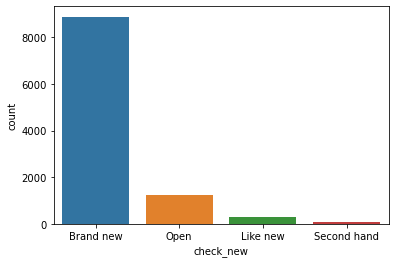

In [16]:
sns.countplot(data = products_new, x = 'check_new')

In [17]:
products_new.category_new.value_counts()

Accessories       5231
Storage           2070
Other             1270
Desktop/Laptop    1161
Iphone             275
Ipad/Ipod          244
Monitor            197
Apple Watch        109
Name: category_new, dtype: int64

In [18]:
products_new.groupby('category_new').agg({'price':'mean'})

,price
category_new,
Accessories,111.054440
Apple Watch,68.074954
Desktop/Laptop,3269.090987
Ipad/Ipod,633.860525
Iphone,753.342945
Monitor,496.354718
Other,210.208947
Storage,897.840769


In [19]:
products_new.loc[products_new.name.str.contains('Apple|Pro|Air', regex=True, flags=re.IGNORECASE)& products_new.name.str.contains('Macbook|Mac', regex=True, flags=re.IGNORECASE) & \
                 (products_new.name.str.contains('Battery|Case|Keyboard|Mouse|Adapter|Headphone|Cable|Protector|Charging|Repair|Multimedia|Memory|AppleCare|Charge', regex=True, flags=re.IGNORECASE) == False) &\
                 (products_new.price > 800) ,'category_new'] = 'Desktop/Laptop'
products_new.loc[products_new.name.str.contains('Apple', regex=True, flags=re.IGNORECASE)&products_new.name.str.contains('Ipod|Ipad', regex=True, flags=re.IGNORECASE) & (products_new.category_new == 'Accessories')&\
                  (products_new.price > 200) , 'category_new'] = 'Ipad/Ipod'
products_new.loc[products_new.name.str.contains('Apple', regex=True, flags=re.IGNORECASE)&products_new.name.str.contains('Iphone', regex=True, flags=re.IGNORECASE) & (products_new.category_new == 'Accessories')&
                  (products_new.price > 300), 'category_new'] = 'Iphone'
products_new.loc[products_new.name.str.contains('Apple', regex=True, flags=re.IGNORECASE)&products_new.name.str.contains('Watch', regex=True, flags=re.IGNORECASE)&\
                  (products_new.price > 40), 'category_new'] = 'Apple Watch'
products_new.loc[products_new.name.str.contains('Monitor', regex=True, flags=re.IGNORECASE)&(products_new.category_new == 'Accessories')&\
                  (products_new.price > 200), 'category_new'] = 'Monitor'
products_new.loc[products_new.name.str.contains('Memory|Server|SSD|HDD|Hard Drive', regex=True, flags=re.IGNORECASE) & (products_new.category_new == 'Accessories')&\
                  (products_new.price > 100), 'category_new'] = 'Storage'
products_new.loc[products_new.name.str.contains('Memory Card|Flash Drive|Headphone', regex=True, flags=re.IGNORECASE), 'category_new'] = 'Accessories'

In [20]:
products_new.category_new.value_counts()

Accessories       4783
Storage           2242
Other             1262
Desktop/Laptop    1211
Apple Watch        294
Iphone             276
Ipad/Ipod          257
Monitor            232
Name: category_new, dtype: int64

In [21]:
products_new.loc[products_new.category_new == 'Ipad/Ipod', 'category_new'] = 'Iphone/Ipad/Ipod'
products_new.loc[products_new.category_new == 'Iphone', 'category_new'] = 'Iphone/Ipad/Ipod'

In [22]:
products_new.category_new.value_counts()

Accessories         4783
Storage             2242
Other               1262
Desktop/Laptop      1211
Iphone/Ipad/Ipod     533
Apple Watch          294
Monitor              232
Name: category_new, dtype: int64

In [23]:
products_new[products_new.category_new == 'Iphone/Ipad/Ipod'].sort_values(by = 'price', ascending = False).head(50)

,sku,name,desc,in_stock,type,price,promo_price,min,max,category_new,check_new
4198,PAC0602,Pack Synology DS1815 + + 40TB WD Red,Pack Synology DS1815 + + 40TB WD Red.,0,Other Type,3059.99000,2560.9900,NaN,NaN,Iphone/Ipad/Ipod,Brand new
3677,APP2133-A,"Like new - Apple iPad Pro 12.9 ""Wi-Fi + Cellular 512GB Silver",iPad Pro 12.9 inch Wi-Fi refurbished 512GB Silver,0,1298,1449.00040,1274.8614,1274.86,1328.38,Iphone/Ipad/Ipod,Like new
9753,APP2138,"Apple iPad Pro 12.9 ""Wi-Fi + Cellular 512GB Space Gray",New iPad Pro 512GB Wi-Fi,0,51861714,1449.00000,1407.0013,3.81,1452.81,Iphone/Ipad/Ipod,Brand new
9751,APP2139,"Apple iPad Pro 12.9 ""Wi-Fi + Cellular 512GB Silver",New iPad Pro 512GB Wi-Fi,0,51861714,1449.00000,1405.0012,1375.15,1452.81,Iphone/Ipad/Ipod,Brand new
9752,APP2140,"Apple iPad Pro 12.9 ""Wi-Fi + Cellular 512GB Gold",Pro New iPad Wi-Fi + Cellular 512GB,0,51861714,1449.00000,1407.0013,1362.24,1452.81,Iphone/Ipad/Ipod,Brand new
9811,APP2492,Apple iPhone X 256GB Silver,New Apple iPhone X 256GB Silver Free,1,113271716,1329.00110,1329.0011,1098.35,1329.00,Iphone/Ipad/Ipod,Brand new
9812,APP2491,Apple iPhone X 256GB Space Gray,New Apple iPhone X 256GB Free Space Gray,1,113271716,1329.00110,1329.0011,1098.35,1329.00,Iphone/Ipad/Ipod,Brand new
9810,AP20459,Like new - Apple iPhone X 256GB Space Gray,X 256GB refurbished iPhone Free,0,113271716,1329.00000,1149.0039,NaN,NaN,Iphone/Ipad/Ipod,Like new
9746,APP2136,"Apple iPad Pro 12.9 ""Wi-Fi 512GB Silver",New iPad Pro 12.9 inch Wi-Fi 512GB,0,51861714,1289.00000,1252.0015,1068.44,1292.81,Iphone/Ipad/Ipod,Brand new
9747,AP20433,"Like new - Apple iPad Pro 12.9 ""Wi-Fi 512GB Space Gray",iPad Pro 12.9 inch Wi-Fi 512GB Reconditioned Gray Space,0,51861714,1289.00000,1072.8114,1072.81,1072.81,Iphone/Ipad/Ipod,Like new


In [24]:
orderlines.drop(columns = 'check_orders', inplace = True)
orders.drop(columns = 'check_orders', inplace = True)

In [25]:
orderlines.drop(columns = 'product_id', inplace = True)

In [26]:
order_orderline_merge = orderlines.merge(orders, how = 'inner', left_on='id_order', right_on='order_id')

In [27]:
products_new

,sku,name,desc,in_stock,type,price,promo_price,min,max,category_new,check_new
0,CEL0052,Celly 4000mAh Battery Power Bank Aluminum Silver,external battery capacity 4000mAh output voltage 5V,0,1515,23.918571,19.9892,19.99,24.99,Accessories,Brand new
1,CEL0051,Celly 4000mAh Battery Power Bank Aluminum Dorado,external battery capacity 4000mAh output voltage 5V,0,1515,23.740000,12.9894,21.24,24.99,Accessories,Brand new
2,CEL0015,Celly fur-lined Powerbank battery 4000mAh Black,Leather-wrapped External Battery 4000mAh for iPhone iPad and iPod.,0,1515,23.990000,23.9895,23.99,23.99,Accessories,Brand new
3,WOE0014,Wowewa M32 External Battery Power Bank 3000mAh White,3000mAh external battery light and compact (77g) with output micro USB and Lightning for iPhone,1,1515,19.990000,9.9898,8.49,16.99,Accessories,Brand new
4,TRI0026,Tribe External Battery Power Bank 2600 mAh 1 in a Minion,2600mAh external battery for iPhone small and ultra-compact.,0,1515,19.990000,19.9892,NaN,NaN,Accessories,Brand new
...,...,...,...,...,...,...,...,...,...,...,...
10552,APP2658,"Apple iMac Pro 27 ""10-core Intel Xeon 3GHz W | 128GB | 4TB SSD | Radeon Pro Vega 64",Pro iMac 27 inch screen Retina 5K and Intel Xeon processor 3GHz W,0,118692158,13419.000000,12614.0044,NaN,NaN,Desktop/Laptop,Brand new
10553,APP2695,"Apple iMac Pro 27 ""14-core Intel Xeon W 25GHz | 128GB | 4TB SSD | Radeon Pro Vega 56",Pro iMac 27 inch screen Retina 5K and Intel Xeon processor W of 25GHz,0,118692158,13659.000000,12839.0051,NaN,NaN,Desktop/Laptop,Brand new
10554,APP2659,"Apple iMac Pro 27 ""14-core Intel Xeon W 25GHz | 128GB | 4TB SSD | Radeon Pro Vega 64",Pro iMac 27 inch screen Retina 5K and Intel Xeon processor W of 25GHz,0,118692158,14379.000000,13516.0049,13799.00,13799.00,Desktop/Laptop,Brand new
10555,APP2696,"Apple iMac Pro 27 ""18-core Intel Xeon W 23GHz | 128GB | 4TB SSD | Radeon Pro Vega 56",Pro iMac 27 inch screen Retina 5K and Intel Xeon processor W of 23GHz,0,118692158,14619.000000,13742.0051,NaN,NaN,Desktop/Laptop,Brand new


In [28]:
product_typ_cbn[product_typ_cbn.type == '13005399']

,type,short_name_desc,short_name,category_new
25,13005399,MacBook MagSafe Charger Air W Pro 2 charger,MacBook Apple MagSafe charger Pro Air 13 2,Accessories


In [29]:
products_new[products_new.type == '13005399']

,sku,name,desc,in_stock,type,price,promo_price,min,max,category_new,check_new
4769,OWC0121,OWC Mercury adapter On-The-Go for OWC Mercury Elite Pro mini,Power adapter for OWC Mercury On-The-Go Elite Pro mini and WC Slim External USB boxes.,0,13005399,8.26,8.2600,NaN,NaN,Accessories,Brand new
4770,MOB0012,Mobee Magic Trackpad Charger Power Bar,Charger for Magic Trackpad.,0,13005399,29.49,29.4877,NaN,NaN,Accessories,Brand new
4771,NTE0016,NewerTech adapter 65W iBook G4 and PowerBook G3 / G4,AC adapter iBook G3 / G4 and PowerBook G4 65W.,0,13005399,49.95,29.9899,NaN,NaN,Accessories,Brand new
4772,TWS0040,Twelve South PlugBug World Dual Charger iPhone and iPad MacBook,dual charger for MacBook MagSafe and USB for iPhone and iPad.,0,13005399,49.99,44.9878,NaN,NaN,Accessories,Brand new
4773,TWS0114,Twelve South PlugBug World Travel Charger 10W USB Red,10W charger adapter with USB connection + 5 international outlets for Mac iPad and iPhone,1,13005399,54.99,39.9905,33.05,52.99,Accessories,Brand new
4774,KEN0194,Kensington 7-port USB 3.0 pockethub,Charger and USB 3.0 HUB with 7 ports.,0,13005399,59.99,52.9895,52.99,59.99,Accessories,Brand new
4775,SAT0087,Satechi Travel Charger 75W Multiport Gray Space,Charger USB 3.0 USB-C and Quick Qcharge 3.0 ports for simultaneous charging devices 4,1,13005399,64.99,49.9899,48.99,52.99,Accessories,Brand new
4776,NTE0105,"NewerTech NuPower battery 63 W Ti PowerBook G4 15 ""(Mod. M6091)",63W battery compatible with 15-inch PowerBook G4 Titanium,0,13005399,71.99,56.9898,NaN,NaN,Accessories,Brand new
4777,APP0408,Apple 45W MagSafe 2 charger MacBook Air,Charger MacBook Air MagSafe 2 of 45 W (MD592Z / A).,0,13005399,89.00,85.0001,75.99,89.00,Accessories,Brand new
4778,APP0409,Apple 85W MagSafe 2 charger MacBook Pro Retina screen 15 '',MagSafe charger 2 of 85 W (MD506Z / A).,1,13005399,89.00,85.0001,70.24,89.00,Accessories,Brand new


In [30]:
df_merge_all = order_orderline_merge.merge(products_new[['sku', 'price', 'type' ,'category_new', 'check_new', 'name']], how = 'left', on = 'sku')

In [31]:
df_merge_all.to_csv('df_merge_all.csv', index=False)

In [35]:
products_new.to_csv('product_new_V1.csv', index = False)

In [33]:
df_merge_all = pd.read_csv('df_merge_all.csv')

C:\Users\Pham Thi Ngan\AppData\Local\Temp\ipykernel_20680\1652614673.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(val/1000000)) + 'M' for val in vals])


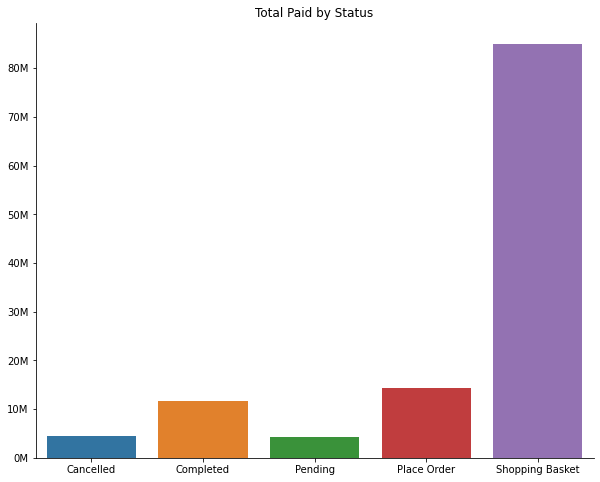

In [34]:
plt.figure(figsize = (10,8))
ax = sns.barplot(data = df_merge_all.groupby('state').agg({'total_price': 'sum'}).reset_index(), x = 'state', y = 'total_price')
plt.ticklabel_format(style='plain', axis='y') # remove scientific notation for the y axis
plt.xlabel('', fontsize = 14)
plt.ylabel('', fontsize = 14)
plt.title('Total Paid by Status')
vals = ax.get_yticks()
ax.set_yticklabels([str(int(val/1000000)) + 'M' for val in vals])
sns.despine() # remove the top and right margin, to make your plot prettier 
